# **EDA `metadatos_fl`**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import itertools
import folium

In [3]:
metadatos=pd.read_parquet("./Google_Maps_data/metadatos_fl.parquet")


In [4]:
metadatos.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,None,25.795204,-80.366038,[Corporate office],5.0,35,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x88d9bfd49a624c3f:0x280afc17e8164d79, 0x88d9...",https://www.google.com/maps/place//data=!4m2!3...
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,None,27.832187,-82.704805,[Cruise agency],5.0,2,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",None,Open ⋅ Closes 5PM,"[0x88c2fd3f88a7ab09:0x56dad3c1999b618f, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...
56,Seminole Family Restaurant,"Seminole Family Restaurant, 6864 Seminole Blvd...",0x88c2fb8614e57ce9:0x40b51628875ad6e9,None,27.834885,-82.787419,None,3.6,8,$$,None,None,None,"[0x88c2fc799a3fa1ad:0x2d1a46c8f525bf3e, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...
87,First Impressions Barbershop Inc.,"First Impressions Barbershop Inc., 577 Deltona...",0x88e711bd2244fe3b:0x8406dd780f0574d1,None,28.877581,-81.281276,[Barber shop],4.0,8,None,"[[Thursday, 8AM–8PM], [Friday, 8AM–8PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 8PM,"[0x88e7139dd918b543:0x2a27a69f19adfc9, 0x88e71...",https://www.google.com/maps/place//data=!4m2!3...
105,"Brian Shaheen, MD","Brian Shaheen, MD, 2421 Thomas Dr, Panama City...",0x8893863ea87bd5dd:0x9383ebf973e74abb,None,30.159982,-85.752277,"[Family practice physician, General practitioner]",4.2,18,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x88938ebfbd53f9c5:0xf6e52004f37523c8, 0x8893...",https://www.google.com/maps/place//data=!4m2!3...


el dataframe metadatos tiene mal el index por lo que lo resetearemos 

In [5]:
metadatos.reset_index(drop=True,inplace=True)
metadatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219167 entries, 0 to 219166
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              219167 non-null  object 
 1   address           219167 non-null  object 
 2   gmap_id           219167 non-null  object 
 3   description       18215 non-null   object 
 4   latitude          219167 non-null  float64
 5   longitude         219167 non-null  float64
 6   category          217752 non-null  object 
 7   avg_rating        219167 non-null  float64
 8   num_of_reviews    219167 non-null  int64  
 9   price             18378 non-null   object 
 10  hours             168006 non-null  object 
 11  MISC              176184 non-null  object 
 12  state             170614 non-null  object 
 13  relative_results  196130 non-null  object 
 14  url               219167 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 25.1+ MB


## 1. **Calidad y consistencia de los datos**

### **Duplicados**: Verificar si `gmap_id` tiene valores duplicados.

In [6]:
metadatos_copy=metadatos.copy()


La columna gmap_id es la columna que identifica a cada negocio dentro de este dataframe. Por lo que no debe tener valores duplicados. Si tiene, se deben eliminar porque es informacion redundante 

In [7]:
# Verificar si hay duplicados en la columna 'gmap_id'
duplicados = metadatos_copy['gmap_id'].duplicated().sum()

if duplicados > 0:
    print(f"Hay {duplicados} valores duplicados en la columna 'gmap_id'.")
    metadatos_copy=metadatos_copy.drop_duplicates(subset="gmap_id",ignore_index=True)
    print("Los duplicados en 'gmap_id' han sido eliminados.")
else:
    print("No hay valores duplicados en la columna 'gmap_id'.")

Hay 1751 valores duplicados en la columna 'gmap_id'.
Los duplicados en 'gmap_id' han sido eliminados.


### **Valores nulos**: Revisar si hay valores faltantes en alguna columna.

In [8]:
# Verificar la cantidad de valores nulos en cada columna
missing_values = metadatos_copy.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
missing_values = missing_values[missing_values > 0]
# Mostrar el resultado
if missing_values.empty:
    print("No hay valores nulos en el DataFrame.")
else:
    print("Valores nulos por columna:")
    print(missing_values)

Valores nulos por columna:
description         199279
category              1396
price               199122
hours                50684
MISC                 42547
state                48089
relative_results     22792
dtype: int64


In [9]:
print(f'Los elementos de la columna {"description"} son de tipo: {type(metadatos_copy.loc[0,"description"])}','\n',
      f'Los elementos de la columna {"category"} son de tipo: {type(metadatos_copy.loc[0,"category"])}','\n',
      f'Los elementos de la columna {"price"} son de tipo: {type(metadatos_copy.loc[100,"price"])}','\n',
      f'Los elementos de la columna {"hours"} son de tipo: {type(metadatos_copy.loc[0,"hours"])}','\n',
      f'Los elementos de la columna {"MISC"} son de tipo: {type(metadatos_copy.loc[0,"MISC"])}','\n',
      f'Los elementos de la columna {"state"} son de tipo: {type(metadatos_copy.loc[0,"state"])}','\n',
      f'Los elementos de la columna {"relative_results"} son de tipo: {type(metadatos_copy.loc[0,"relative_results"])}')

Los elementos de la columna description son de tipo: <class 'NoneType'> 
 Los elementos de la columna category son de tipo: <class 'numpy.ndarray'> 
 Los elementos de la columna price son de tipo: <class 'str'> 
 Los elementos de la columna hours son de tipo: <class 'numpy.ndarray'> 
 Los elementos de la columna MISC son de tipo: <class 'dict'> 
 Los elementos de la columna state son de tipo: <class 'str'> 
 Los elementos de la columna relative_results son de tipo: <class 'numpy.ndarray'>


- La columna **description** posee la descripcion del negocio. Por el número de elementos nulos, no podemos eliminarlos porque se pierden muchos datos. Por lo que se los rellenará con strings vacíos.
- La columna **category** posee arreglos de numpy con las categorias asociadas a cada negocio. Por lo que sus valores nulos seran rellenados con arreglos vacíos.
- La columna **price** contiene una categorizacion sobre el servicio del negocio son mas caros o no y estan escritos en formato de $, $$, $$$, etc. Los elementos nulos serán rellenados con str vacíos.
- La columna **hours** contiene arreglos de numpy, por lo que los elementos nulos serán rellenados con arreglos de numpy vacíos. 
- La columna **MISC** posee diccionarios, por lo que sus elementos nulos serán rellenados con diccionarios vaciós.
- La columna **state** posee informacion del estado en el que está cada negocio. Como todos estan el Florida, es info redundante. Por lo que se eliminará esta columna. 
- La columna **relative_results** contiene arreglos de numpy, por lo que los elementos nulos serán rellenados con arreglos de numpy vacíos.

In [10]:
metadatos_copy['description']= metadatos_copy['description'].fillna(" ",)
metadatos_copy['category']=metadatos_copy['category'].fillna("[]")
metadatos_copy['price']=metadatos_copy['price'].fillna(" ")
metadatos_copy['hours']=metadatos_copy['hours'].fillna("[]")
metadatos_copy['MISC']=metadatos_copy['MISC'].fillna("{}")
metadatos_copy['relative_results']=metadatos_copy['relative_results'].fillna("[]")
metadatos_copy.drop(columns="state",inplace=True)


In [11]:
metadatos_copy["category"]=metadatos_copy["category"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
metadatos_copy["hours"]=metadatos_copy["hours"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
metadatos_copy["MISC"]=metadatos_copy["MISC"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
metadatos_copy["relative_results"]=metadatos_copy["relative_results"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [12]:
# Intentamos convertir las entradas de la columna 'category' de una forma más segura y directa
def safe_convert_to_list(x):
    try:
        # Convertir las cadenas que representan arrays de numpy a listas
        if isinstance(x, str) and 'array' in x:
            return list(eval(x))
        elif isinstance(x, str):
            return [x]  # En caso de que sea una cadena sin formato de array
        return x  # Si ya es una lista o algo más, no hacer nada
    except:
        return []  # Si algo falla, devolver una lista vacía

# Aplicamos la conversión segura a la columna 'category'
metadatos_copy['category'] = metadatos_copy['category'].apply(safe_convert_to_list)
metadatos_copy['hours'] = metadatos_copy['hours'].apply(safe_convert_to_list)
metadatos_copy['relative_results'] = metadatos_copy['relative_results'].apply(safe_convert_to_list)

- **Valores fuera de rango o extraños**: Detectar valores anómalos en `avg_rating` y `price`

In [13]:
valid_ranges = {'avg_rating': (1, 5)}  # Debe estar entre 1 y 5

# Identificar valores fuera de rango en cada columna
outliers = {}
for col, (min_val, max_val) in valid_ranges.items():
    if max_val is not None:
        outliers[col] = metadatos_copy[(metadatos_copy[col] < min_val) | (metadatos_copy[col] > max_val)]
    else:
        outliers[col] = metadatos_copy[metadatos_copy[col] < min_val]

# Mostrar resultados
for col, df in outliers.items():
    count = df.shape[0]
    print(f"Valores fuera de rango en '{col}': {count}")
    if count > 0:
        print(df[[col]].head())  # Muestra algunos ejemplos de valores anómalos

Valores fuera de rango en 'avg_rating': 0


In [14]:
print(f'Valores únicos de la columna price {metadatos_copy["price"].unique()}')
# Reemplazar todos los símbolos ₩ por $ en la columna 'price'
metadatos_copy['price'] = metadatos_copy['price'].apply(lambda x: x.replace('₩', '$') if isinstance(x, str) else x)
print("Los símbolos ₩ han sido reemplazados por $")


Valores únicos de la columna price [' ' '$$' '$' '$$$' '$$$$' '₩₩' '₩' '₩₩₩' '₩₩₩₩']
Los símbolos ₩ han sido reemplazados por $


In [15]:
#Crear una nueva columna que cuente la cantidad de veces que aparece el símbolo '$' en la columna 'price'
metadatos_copy["price_num"]=metadatos_copy['price'].apply(lambda x: x.count('$') if isinstance(x, str) else 0)

Este cambio se realizó porque el símbolo "₩" es de la moneda coreana. Aunque no sea un error que el negocio se page en esa moneda, el símbolo de dinero y la cantidad de veces que se repite nos dice lo costosos que son los productos de un negocio. Por esto, que el símbolo utilizado sea "₩" o "$", significa lo mismo. Por lo que ponemos todo bajo el mísmo símbolo para facilitar el análisis.

In [16]:
'''def obtener_ciudad(lat, lon):
    geolocator = Nominatim(user_agent="mi_aplicacion")  # Es importante especificar un 'user_agent'
    location = geolocator.reverse((lat, lon), language='en')
    
    if location:
        address = location.raw.get('address', {})
        return address.get('city', 'Ciudad no encontrada')
    return 'Ciudad no encontrada'

# Aplicar la función al DataFrame
metadatos1['ciudad'] = metadatos1.apply(lambda row: obtener_ciudad(row['latitude'], row['longitude']), axis=1)
'''

'def obtener_ciudad(lat, lon):\n    geolocator = Nominatim(user_agent="mi_aplicacion")  # Es importante especificar un \'user_agent\'\n    location = geolocator.reverse((lat, lon), language=\'en\')\n    \n    if location:\n        address = location.raw.get(\'address\', {})\n        return address.get(\'city\', \'Ciudad no encontrada\')\n    return \'Ciudad no encontrada\'\n\n# Aplicar la función al DataFrame\nmetadatos1[\'ciudad\'] = metadatos1.apply(lambda row: obtener_ciudad(row[\'latitude\'], row[\'longitude\']), axis=1)\n'

## 2. **Analisis de `category`**

Primero veamos cuales son las categorías con mas negocios asociados

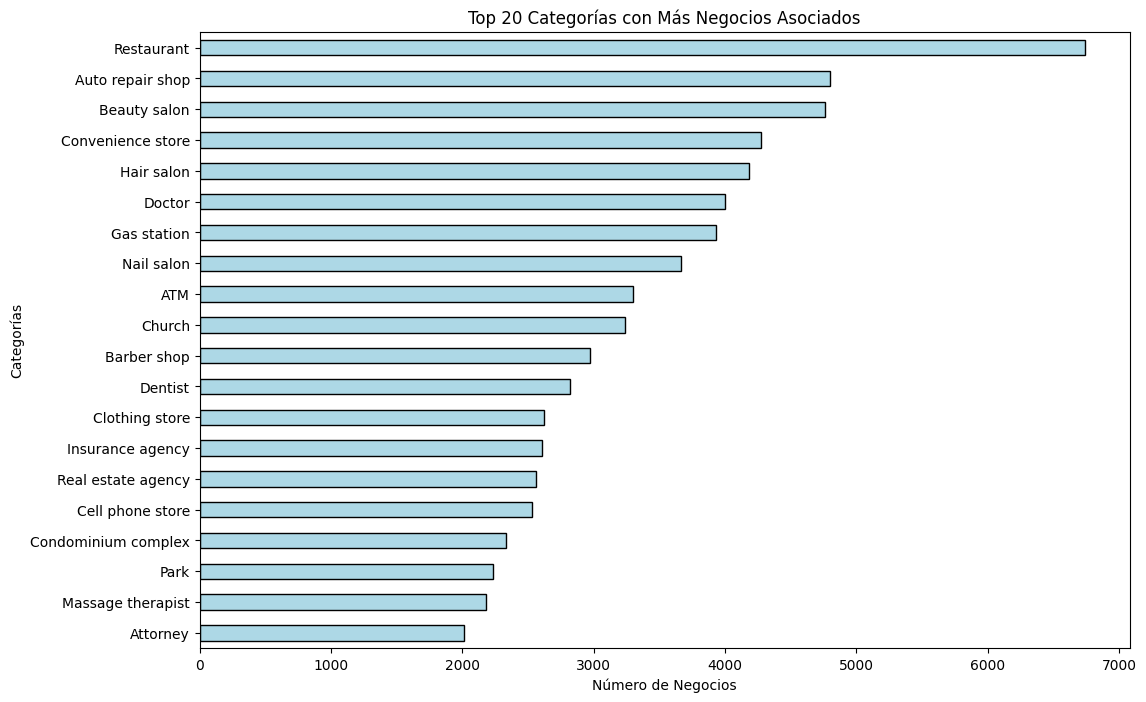

In [17]:
# Contar la frecuencia de cada categoría
all_categories = [category for sublist in metadatos_copy['category'].dropna() for category in sublist]

# Contar las categorías más frecuentes
category_counts = pd.Series(all_categories).value_counts().head(20)

# Ordenar las categorías por el número de negocios en orden descendente
category_counts_sorted = category_counts.sort_values(ascending=True)

# Crear el gráfico de barras horizontal con las categorías ordenadas
plt.figure(figsize=(12, 8))
category_counts_sorted.plot(kind='barh', color='lightblue', edgecolor='black')
plt.ylabel('Categorías')
plt.xlabel('Número de Negocios')
plt.title('Top 20 Categorías con Más Negocios Asociados')
plt.show()

Se puede ver que "Restaurant" es la categoría con mas número de negocios asociados, aunque hay mas relacionados con gastronomía que no estan en la categoria "Restaurant".

Veamos ahora cuales son las categorías con mayor número de reseñas

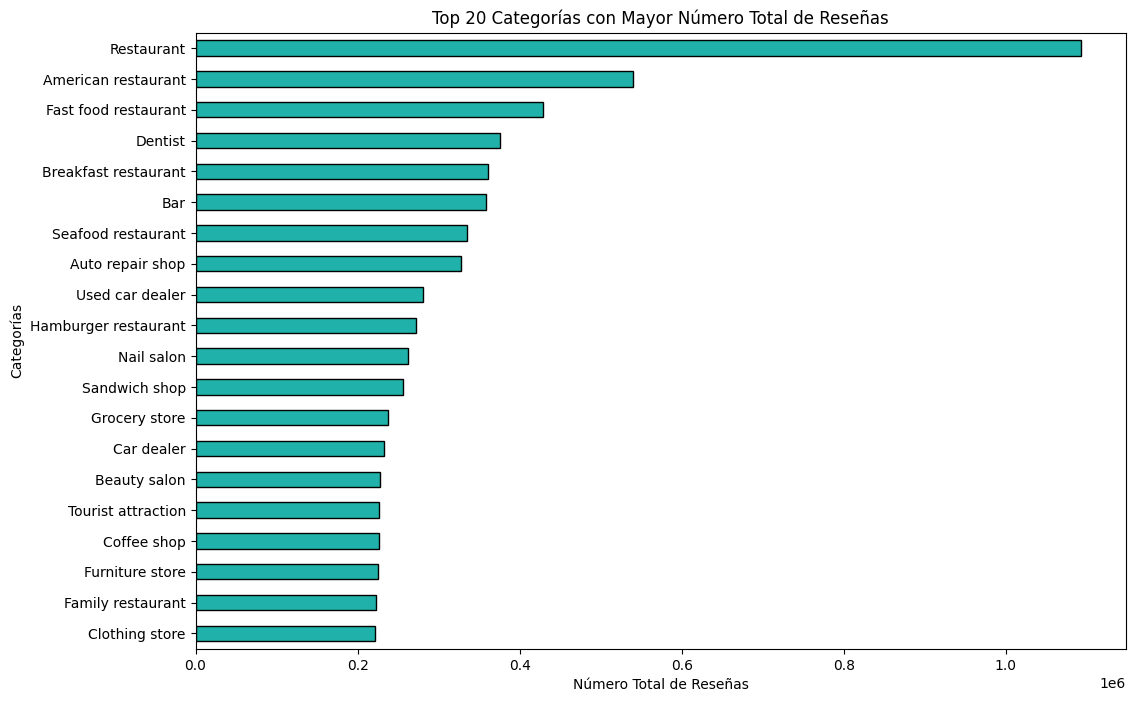

In [18]:
# Asegurémonos de que las categorías estén bien formateadas (desanidar listas si es necesario)
metadatos_copy_expanded = metadatos_copy.explode('category')

# Calcular el total de reseñas y el promedio de reseñas por categoría
category_total_reviews = metadatos_copy_expanded.groupby('category')['num_of_reviews'].sum()

# Crear el gráfico de barras horizontales para el total de reseñas por categoría
plt.figure(figsize=(12, 8))
category_total_reviews.sort_values(ascending=True).tail(20).plot(kind='barh', color='lightseagreen', edgecolor='black')
plt.title('Top 20 Categorías con Mayor Número Total de Reseñas')
plt.xlabel('Número Total de Reseñas')
plt.ylabel('Categorías')
plt.show()

En esta gráfica se puede ver que, dentro de las 20 categorías con mas reseñas, casi todas están relacionadas con gastronomía.

**Concluciones**  
Esto sumado al hecho de que la categoría "Restaurant" es la que tiene mas negocios, hace que sea una buena idea sentrar el analisis de mercado en los negocios relacionados con la gastronomía. 

Veamos que categorías estan relacionadas con locales de comida o restoranes 

In [19]:
# Asegurarse de que la columna 'category' contiene listas (si está en formato string, convertirla)
metadatos_copy['category'] = metadatos_copy['category'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Aplanar la lista de categorías y contar frecuencia
category_counts = Counter(itertools.chain.from_iterable(metadatos_copy['category'].dropna()))

# Convertir a DataFrame
df_categories = pd.DataFrame(category_counts.items(), columns=['Category', 'Frequency'])

# Filtrar categorías que contengan "restaurant", "food" o "bar" como palabras completas
filtered_categories = df_categories[df_categories["Category"].str.contains(r"restaurant|food|\b(bar)\b", case=False, na=False)]

# Mostrar las primeras filas del filtrado
print(filtered_categories.head(20))

                     Category  Frequency
5                  Restaurant       6744
6           Buffet restaurant         70
120  Modern French restaurant          6
149                       Bar       1729
206        Mexican restaurant        681
290        Takeout Restaurant       1288
311         Health food store        438
331                Sports bar        289
332       American restaurant       1079
337      Fast food restaurant       1696
339         Indian restaurant         89
388         Kosher restaurant         68
390          Pizza restaurant       1270
408               Bar & grill        574
420        Seafood restaurant        664
421          Cajun restaurant         60
422  Chicken wings restaurant        274
588   Puerto Rican restaurant         69
589   Nuevo Latino restaurant         25
604    Health food restaurant        398


C:\Users\maria\AppData\Local\Temp\ipykernel_20464\3857293280.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_categories = df_categories[df_categories["Category"].str.contains(r"restaurant|food|\b(bar)\b", case=False, na=False)]


In [20]:
# Convertir las categorías permitidas en un conjunto en minúsculas
allowed_categories = set(filtered_categories["Category"].str.lower().str.strip())

# Separar la columna 'category' en filas individuales (una categoría por fila)
metadatos_exploded = metadatos_copy.explode("category")

# Convertir a minúsculas y quitar espacios extra para evitar problemas
metadatos_exploded["category"] = metadatos_exploded["category"].str.lower().str.strip()

# Filtrar solo las filas donde la categoría está en allowed_categories
metadatos_filtered = metadatos_exploded[metadatos_exploded["category"].isin(allowed_categories)]

# Volver a agrupar por gmap_id para restaurar la estructura original
metadatos_filtered = metadatos_filtered.groupby("gmap_id").first().reset_index()

In [21]:
metadatos1=metadatos_filtered.copy()

## 3. **Analisis de `num_of_reviews`, `price` y `avg_rating`**

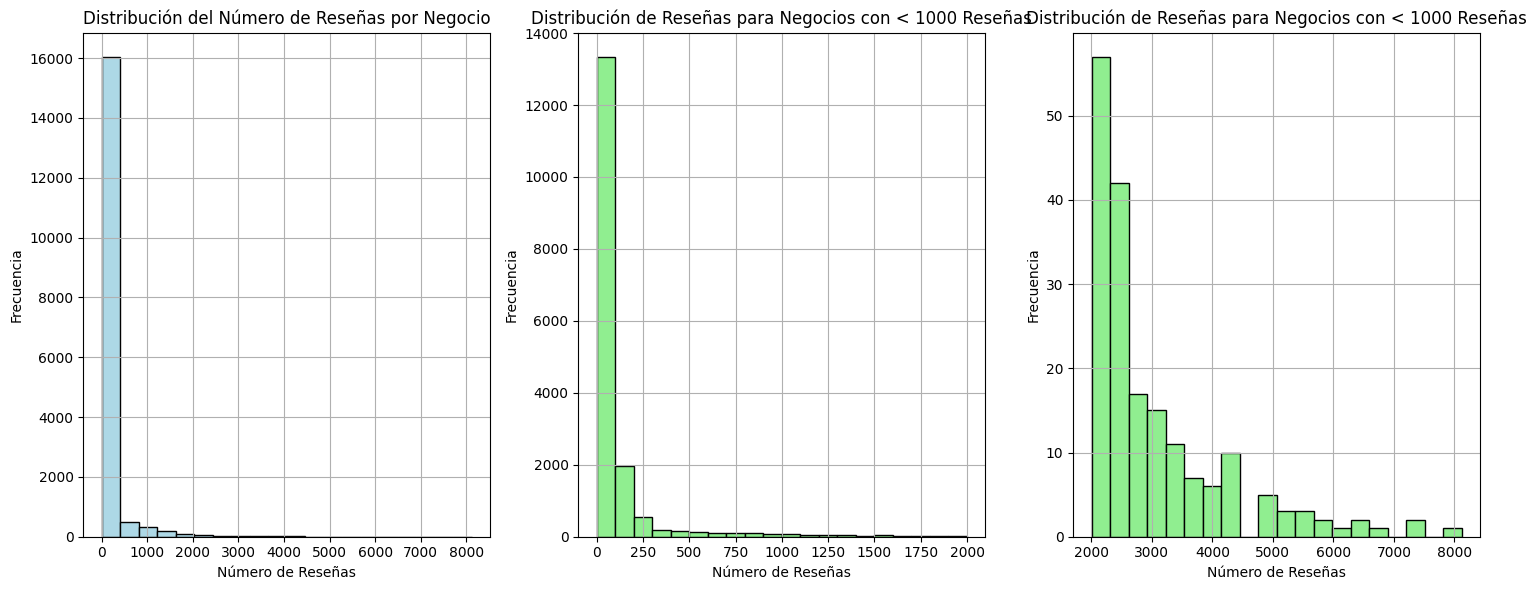

In [22]:
# Filtrar los negocios que tienen menos de 1000 reseñas
df_filtered = metadatos1[metadatos1['num_of_reviews'] < 2000]
df_filtered_mas2000 = metadatos1[metadatos1['num_of_reviews'] > 2000]
# Crear el bloque de gráficas con dos histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Primer histograma: Distribución del número de reseñas (sin filtrar)
axes[0].hist(metadatos1['num_of_reviews'], bins=20, color='lightblue', edgecolor='black')
axes[0].set_xlabel('Número de Reseñas')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Número de Reseñas por Negocio')
axes[0].grid(True)

# Segundo histograma: Distribución del número de reseñas para num_of_reviews < 1000
axes[1].hist(df_filtered['num_of_reviews'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Número de Reseñas')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Reseñas para Negocios con < 1000 Reseñas')
axes[1].grid(True)

# Segundo histograma: Distribución del número de reseñas para num_of_reviews < 1000
axes[2].hist(df_filtered_mas2000['num_of_reviews'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_xlabel('Número de Reseñas')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Distribución de Reseñas para Negocios con < 1000 Reseñas')
axes[2].grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

Se puede ver que hay una gran concentracion del número de reviews en los rango mas bajos, por debajo de las 200. En cambio hay muy pocos negocios con mas de 2000 reviews en comparación.

### **Correlación entre el número de reviews y la calificacion promedio**

Crearemos una columna con el número de veces que aparece el símbolo $ en un negocio

El número de negocios con menos de 2000 reviews es 17104. Mentras que solo 185 de negocios tienen mas de 2000 reseñas


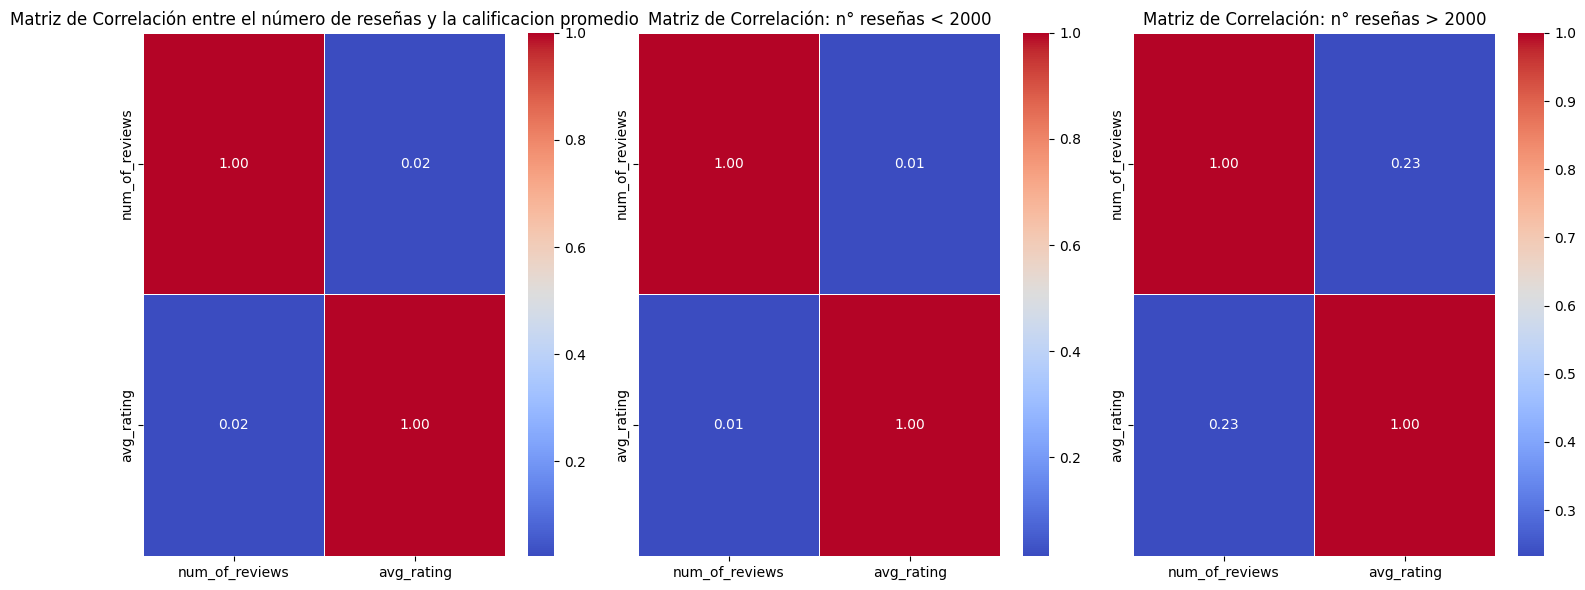

In [23]:
# Crear una matriz de correlación para comparar las relaciones entre las variables numéricas
correlation_matrix = metadatos1[['num_of_reviews', 'avg_rating']].corr()
correlation_matrix1 = df_filtered[['num_of_reviews', 'avg_rating']].corr()
correlation_matrix2 = df_filtered_mas2000[['num_of_reviews', 'avg_rating']].corr()

print(f'El número de negocios con menos de 2000 reviews es {df_filtered.shape[0]}. Mentras que solo {df_filtered_mas2000.shape[0]} de negocios tienen mas de 2000 reseñas')

# Crear un bloque de matrices de correlación para comparar las variables utilizadas en los histogramas
# Para ello, usaremos las columnas 'num_of_reviews' y 'avg_rating', y para el segundo histograma, también 'num_of_reviews' filtrado por <1000

# Crear el bloque de gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Matriz de correlación para todos los datos
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Matriz de Correlación entre el número de reseñas y la calificacion promedio')

# Matriz de correlación para los negocios con <1000 reseñas
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Matriz de Correlación: n° reseñas < 2000')

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[2])
axes[2].set_title('Matriz de Correlación: n° reseñas > 2000')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

Al analizar todo los negocios no se encuentra una correlacion reelevante entre el número de reseñas y la calificacion promedio. Lo mismo ocurre cuando analizamos los negocios con menos de 2000 reseñas. Pero cuando analizamos los que tienen mas de 2000, podemos ver que hay una correlacion positiva mucho más marcada. Osea que, para los negocios con más reviews, mas interacciones pueden implicar mejor calificacion promedio. Pero esta correlacion se pierde cuando se analizan todos. Y, debido a que el número de negocios del primer grupo supera por 2 ordenes de magnitud al segundo, esta correlacion no se tomará en cuenta. Se estarían analizando muy pocos negocios como para sacar concluiciones reales.

**Conclución**

Como la correlacion entre la calificación promedio y el numero de reviews es muy baja de forma general, no se las relacionará mas adelante 

### **Correlación entre el número de reviews y el costo de los servicios del negocio**

Hora sumemos a la comparacion el costo de los servicios del negocio. Como hay negocios que no tienen la informacion del precio, solo analizaremos sobre los negocios que si la tengan. 

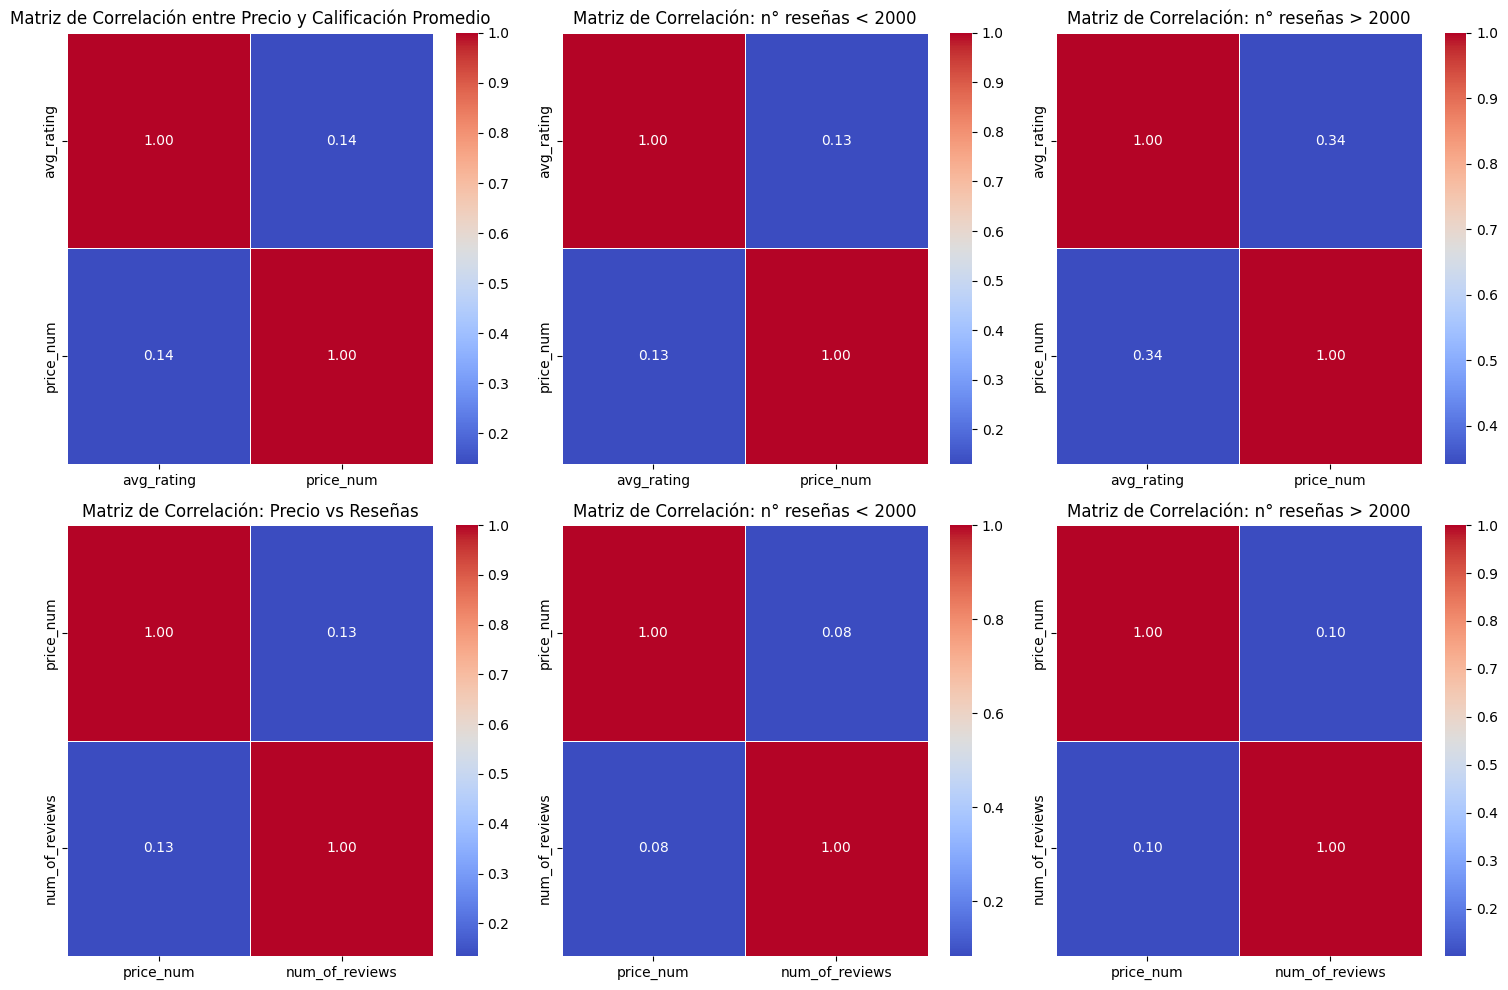

In [24]:
metadatos_price=metadatos1[metadatos1['price_num'] > 0] # Analizamos solo los negocios que tengan informacion del precio  
df_filtered_price = metadatos_price[metadatos_price['num_of_reviews'] < 2000]
df_filtered_price_mas2000 = metadatos_price[metadatos_price['num_of_reviews'] > 2000]

# Crear una matriz de correlación para comparar las relaciones entre las variables numéricas
correlation_matrix = metadatos_price[['avg_rating','price_num']].corr()
correlation_matrix1 = df_filtered_price[['avg_rating','price_num']].corr()
correlation_matrix2 = df_filtered_price_mas2000[['avg_rating','price_num']].corr()
correlation_matrix3 = metadatos_price[['price_num','num_of_reviews']].corr()
correlation_matrix4 = df_filtered_price[['price_num','num_of_reviews']].corr()
correlation_matrix5 = df_filtered_price_mas2000[['price_num','num_of_reviews']].corr()

# Crear un bloque de matrices de correlación para comparar las variables utilizadas en los histogramas
# Para ello, usaremos las columnas 'num_of_reviews' y 'avg_rating', y para el segundo histograma, también 'num_of_reviews' filtrado por <1000

# Crear el bloque de gráficos 2x3 para las matrices de correlación
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Matriz de correlación para todos los datos (precio y calificación promedio)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Matriz de Correlación entre Precio y Calificación Promedio')

# Matriz de correlación para los negocios con <2000 reseñas
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Matriz de Correlación: n° reseñas < 2000')

# Matriz de correlación para los negocios con >2000 reseñas
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0, 2])
axes[0, 2].set_title('Matriz de Correlación: n° reseñas > 2000')

# Matriz de correlación entre precio y número de reseñas
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Matriz de Correlación: Precio vs Reseñas')

# Matriz de correlación para los negocios con <2000 reseñas (precio y número de reseñas)
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Matriz de Correlación: n° reseñas < 2000')

# Matriz de correlación para los negocios con >2000 reseñas (precio y número de reseñas)
sns.heatmap(correlation_matrix5, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1, 2])
axes[1, 2].set_title('Matriz de Correlación: n° reseñas > 2000')

# Ajustar la disposición de las gráficas
plt.tight_layout()
plt.show()



1. **Correlacion entre entre el costo y Calificación Promedio:**  
   - Para los negocios con menos de 2000 reseñas se puede ver que la correlación positiva.
   - Para los negocios con más de 2000 reseñas se puede ver que la correlación es más significativa todavía.
   - Si analizamos todo el conjunto de datos podemos ver que, devido a la gran diferencia de cantidad de negocios entre los dos grupos, esa gran correlacion para el segundo entre el costo y la calificacion promedio se pierde un poco.

   Esta correlacion puede venir por parte de que cuando un restaurant tiene mayor puntuacion puede cobrar mas por sus productos.

2. **Correlacion entre entre el costo y número de reseñas:**  
      Podemos ver que si analizamos el conjunto completo de restoranes, la correlación se vuelve mas relevante. Esta correlación puede tener que ver con que cuando un restaurant es mas costoso, las personas se toman el trabajo de reseñarlo, ya sea de forma positiva o negativa.
   

**Conclución de esta sección**

Si bien hay correlación entre la calificación promedio y el resto de variables tratadas, estas correlaciones no son tan reelevantes. No se puede pensar que por aumentar el precio vaya a mejorar la calificación promedio del restaurant. Buscaremos otras variables que puedan aportar a la calificación de un restaurant.

## 4. **Analisis de 'MISC'**

En esta columna se encuentran diccionarios en el que las claves son categorias de atributos de los negocios, los valores de las claves son arreglos de numpy con las características o atributos de cada negocio. La idea es saber, de todos esos atributos, cuales son los 20 más repetidos en los negocios y luego ver la correlacion que puede haber entre estos y la calificación promedio.

In [25]:
# Normalizar la columna 'MISC' y convertir los diccionarios en columnas
misc_normalized = pd.json_normalize(metadatos1['MISC'])

# Concatenar las nuevas columnas con el DataFrame original
metadatos2 = pd.concat([metadatos1.drop(columns="MISC"), misc_normalized], axis=1)

# Ahora 'metadatos1' tendrá las columnas originales más las nuevas columnas del diccionario.

columnas_analizar=[
        'Accessibility', 'Activities',
       'Amenities', 'Atmosphere', 'Crowd', 'Dining options',
       'From the business', 'Getting here', 'Health & safety',
       'Health and safety', 'Highlights', 'Lodging options', 'Offerings',
       'Payments', 'Planning', 'Popular for', 'Recycling', 'Service options']

# Rellenamos los elementos vacíos de las columnas en "columnas_analizar" con arreglos de numpy vacíos
for col in columnas_analizar:
    metadatos2[col]=metadatos2[col].apply(lambda x: x if isinstance(x, np.ndarray) else np.array([]))

Desanidamos las columnas que estan en "columnas_analizar" compuestas por arreglos de numpy. Las nuevas columnas estarán compuestas solo por 1, en el caso de que el negocio tuviera esa característica, y 0 en el caso de que no lo fuera. 

In [26]:
for col in columnas_analizar:    
    # Primero, obtenemos todos los valores únicos
    unique_values = set([item for sublist in metadatos2[col] if isinstance(sublist, np.ndarray) for item in sublist])

    # Crear una columna para cada valor único
    for value in unique_values:
        metadatos2[value] = metadatos2[col].apply(lambda x: 1 if isinstance(x, np.ndarray) and value in x else 0)

    # Eliminar la columna
    metadatos2.drop(columns=col, inplace=True)

# Ver el DataFrame resultante
print(metadatos2.columns)

C:\Users\maria\AppData\Local\Temp\ipykernel_20464\2773279280.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadatos2[value] = metadatos2[col].apply(lambda x: 1 if isinstance(x, np.ndarray) and value in x else 0)
C:\Users\maria\AppData\Local\Temp\ipykernel_20464\2773279280.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadatos2[value] = metadatos2[col].apply(lambda x: 1 if isinstance(x, np.ndarray) and value in x else 0)
C:\Users\maria\AppData\Local\Temp\ipykernel_20464\2773279280.py:7: PerformanceWarning: DataFrame

Index(['gmap_id', 'name', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price',
       ...
       'Online care', 'Drive-through', 'Language assistance',
       'Curbside pickup', 'Online classes', 'Takeout', 'In-store shopping',
       'No-contact delivery', 'Dine-in', 'Online estimates'],
      dtype='object', length=178)


C:\Users\maria\AppData\Local\Temp\ipykernel_20464\2773279280.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadatos2[value] = metadatos2[col].apply(lambda x: 1 if isinstance(x, np.ndarray) and value in x else 0)
C:\Users\maria\AppData\Local\Temp\ipykernel_20464\2773279280.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadatos2[value] = metadatos2[col].apply(lambda x: 1 if isinstance(x, np.ndarray) and value in x else 0)


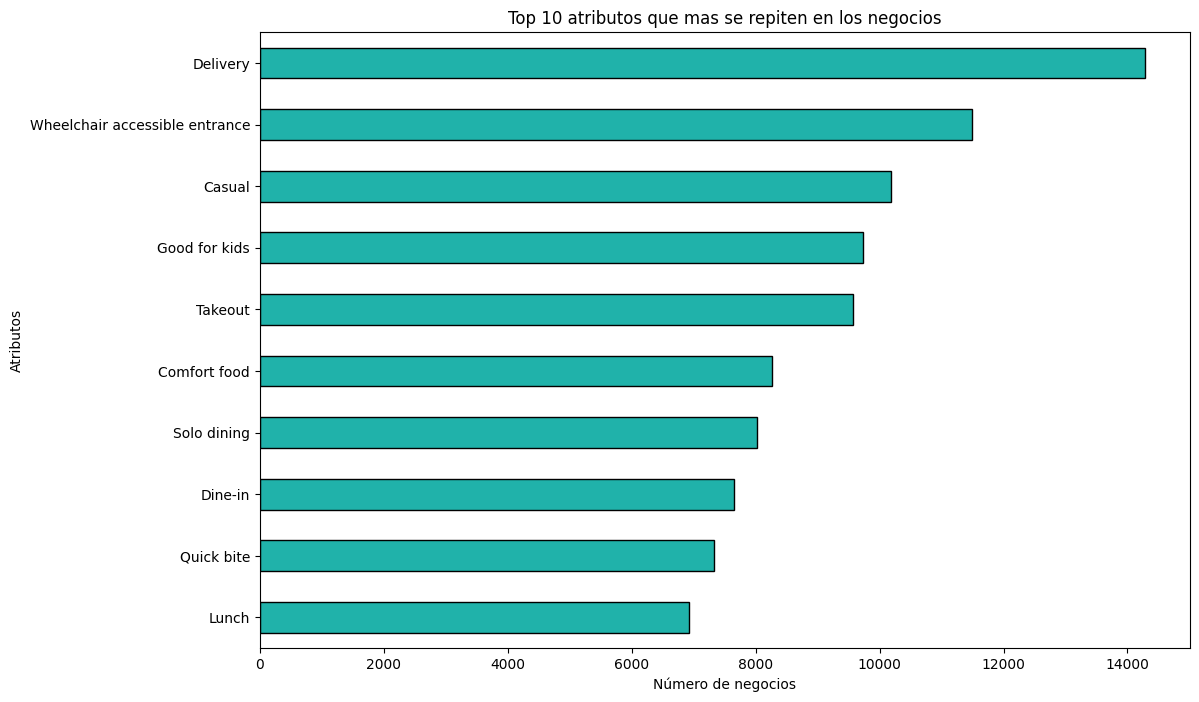

In [27]:
# Dejamos en metadatos2 solo las columnas que vamos a poner en la gráfica 
columnas_a_eliminar=[
        'name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours',
       'relative_results', 'url', 'price_num'
]

metadatos2.drop(columns=columnas_a_eliminar,inplace=True)

# Contar el número de 1's en cada columna
column_counts = metadatos2.sum(axis=0)

# Ordenar las columnas por la cantidad de 1's en orden descendente y obtener las top 20
top_10_columns = column_counts.sort_values(ascending=False).head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))

# Aquí ordenamos los valores para asegurarnos de que el gráfico lo muestre de mayor a menor
top_10_columns.sort_values(ascending=True).plot(kind='barh', color='lightseagreen', edgecolor='black')
plt.title('Top 10 atributos que mas se repiten en los negocios')
plt.xlabel('Número de negocios')
plt.ylabel('Atributos')

# Mostrar el gráfico
plt.show()


Expliquemos que son algunos de estos atributos:
- El término "Comfort food" se refiere a alimentos que proporcionan consuelo o sensación de bienestar emocional. Generalmente, estos son platos que se asocian con la nostalgia, el hogar y la simplicidad, y suelen ser muy reconfortantes en momentos de estrés o tristeza. Por ejemplo: pizza, macarrones con queso, Comida frita, hamburguesas, etc.
- El término "Solo dining" se refiere a comer solo en un restaurante o en cualquier otro lugar de comida. Es una práctica en la que una persona decide ir a un restaurante o café a comer sin compañía, disfrutando de la comida y la experiencia en solitario.
- "Quick bite" es una expresión en inglés que se refiere a una comida rápida o ligera que se consume en poco tiempo.


Veamos la correlacion que puede haber esntre estos atributos marcados y la calificación promedio 

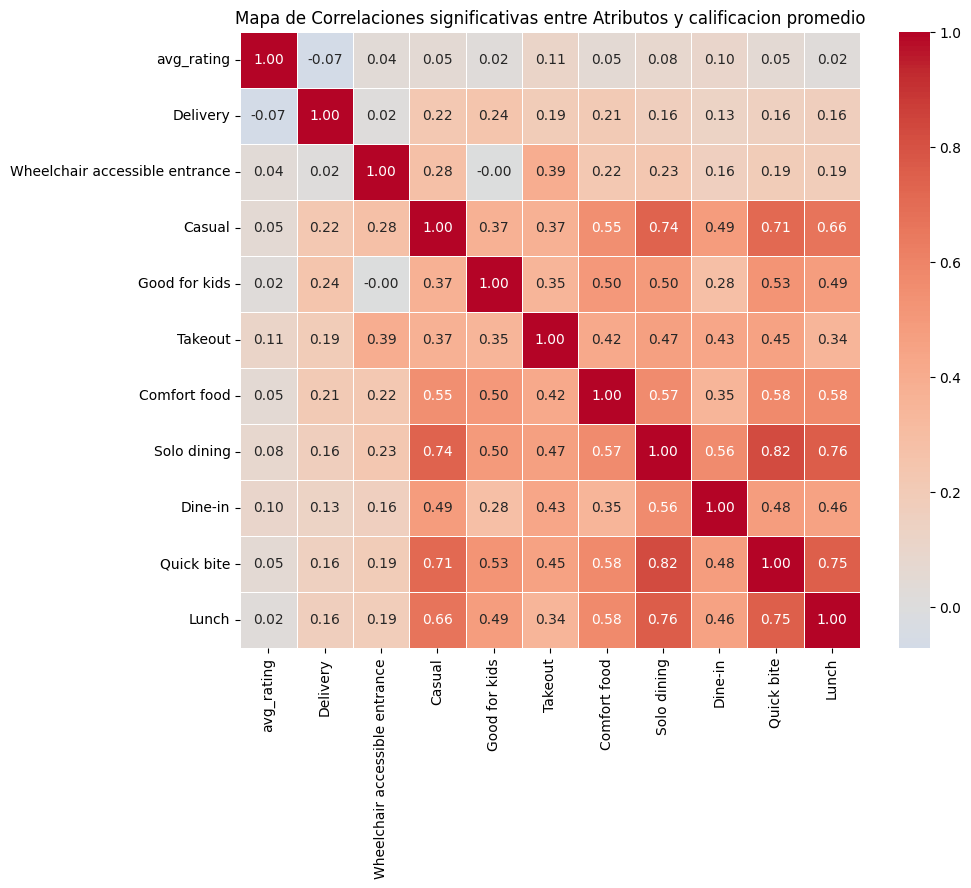

In [28]:
# Seleccionar las columnas del top 20 en base a la frecuencia de los 1's
top_10_column_names = top_10_columns.index

# Filtrar `new_columns` para conservar solo las columnas que están en el top 20
metadatos2_top_10 = metadatos2[top_10_column_names]

# Ver el DataFrame resultante con solo las columnas del top 20

# Agregamos este dataframe al dataframe original de metadatos
metadatos3=pd.concat([metadatos1.drop(columns=['address','description','hours','relative_results','url','MISC']),metadatos2_top_10],axis=1)

correlation_matrix_atributos = metadatos3[['avg_rating']+top_10_column_names.tolist()].corr()

# Filtrar las columnas con correlación significativa |corr| > 0.1
significant_corr = correlation_matrix_atributos[abs(correlation_matrix_atributos[['avg_rating']]) > 0.1].index
filtered_corr_matrix = correlation_matrix_atributos.loc[significant_corr, significant_corr]

# Crear un heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_atributos, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, center=0)
plt.title("Mapa de Correlaciones significativas entre Atributos y calificacion promedio")
plt.show()

Hay que recordar que los atributos no son excluyentes. Un restoran puede tener varios a la vez

**Concluciones del grafico de las correlaciones:**
- *Correlacion con la calificación promedio:*
    - "Delivery" es el único atributo del restoran que está correlacionado de forma negativa con la calificacion, pero esta correlación es bastante debil.
    - "Take out" y "Dine-in" son los únicos atributos con una correlacion medianamente relevante con la calificacion promedio. El resto de atributos, menos "Delivery", tambien tienen una correlación positiva con la calificación del restaurant, pero es mas debil.

    Como conclucion podemos decir que, dentro del archivo `metadatos_rest_FL.parquet` no hay ningún atributo que esté reelevantemente correlacionado con la califiación promedio un restoran en Florida y que sirva implementar. Poner opciones para take out, dine in, solo dining y quick bite puede ser una buena práctica para mejorar la calificación promedio. Pero no de forma considerable. 

In [29]:

'''# Asegurarse de que las columnas son de tipo float
metadatos3['latitude'] = metadatos3['latitude'].astype(float)
metadatos3['longitude'] = metadatos3['longitude'].astype(float)

# Crear el mapa centrado en una ubicación inicial (aquí elegimos una ubicación media, puedes cambiarla)
# Puedes elegir una coordenada central, por ejemplo: la latitud y longitud promedio de tus datos
map_center = [metadatos3['latitude'].mean(), metadatos3['longitude'].mean()]

# Crear el objeto mapa
mymap = folium.Map(location=map_center, zoom_start=12)

# Añadir un marcador para cada ubicación en el dataframe
for idx, row in metadatos.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(mymap)

# Mostrar el mapa
mymap.save("map.html")  # Esto guardará el mapa como un archivo HTML
mymap'''

'# Asegurarse de que las columnas son de tipo float\nmetadatos3[\'latitude\'] = metadatos3[\'latitude\'].astype(float)\nmetadatos3[\'longitude\'] = metadatos3[\'longitude\'].astype(float)\n\n# Crear el mapa centrado en una ubicación inicial (aquí elegimos una ubicación media, puedes cambiarla)\n# Puedes elegir una coordenada central, por ejemplo: la latitud y longitud promedio de tus datos\nmap_center = [metadatos3[\'latitude\'].mean(), metadatos3[\'longitude\'].mean()]\n\n# Crear el objeto mapa\nmymap = folium.Map(location=map_center, zoom_start=12)\n\n# Añadir un marcador para cada ubicación en el dataframe\nfor idx, row in metadatos.iterrows():\n    folium.Marker([row[\'latitude\'], row[\'longitude\']]).add_to(mymap)\n\n# Mostrar el mapa\nmymap.save("map.html")  # Esto guardará el mapa como un archivo HTML\nmymap'

In [ ]:
from geopy.geocoders import Nominatim

# Crear una instancia del geolocalizador
geolocator = Nominatim(user_agent="geoapiExercises")

# Función para obtener la ciudad a partir de latitud y longitud
def get_city_from_coords(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        # Extraer el nombre de la ciudad si está disponible
        address = location.raw['address']
        city = address.get('city', '') or address.get('town', '') or address.get('village', '')
        return city
    except:
        return 'Ciudad no encontrada'

# Aplicar la función a las coordenadas en el DataFrame
metadatos3['city'] = metadatos3.apply(lambda row: get_city_from_coords(row['latitude'], row['longitude']), axis=1)

# Ver las primeras filas para comprobar
print(metadatos3[['latitude', 'longitude', 'city']].head())

In [ ]:
metadatos3.to_parquet("./Google_Maps_data/metadatos_rest_FL.parquet")